In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    classification_report,
)
import pickle
from math import sqrt
from sklearn.gaussian_process.kernels import *

In [96]:
data_class = pd.read_csv("C:/reps/PoP2023-24/2_sem/1_lab/data/apple_quality.csv")
data_reg = pd.read_csv("C:/reps/PoP2023-24/2_sem/1_lab/data/Housing.csv")

# Классификация

In [97]:
data_class.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [98]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [99]:
data_class.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


- A_id: Уникальный идентификатор для каждого фрукта
- Size: Размер плода
- Weight: Вес плода
- Sweetness: Степень сладости фруктов
- Crunchiness: текстура, указывающая на хрусткость фруктов
- Juiciness: Уровень сочности плодов
- Ripeness: Стадия спелости плодов
- Acidity: уровень кислотности фруктов
- Quality: Общее качество плодов

In [100]:
data_class.drop(["A_id"], axis=1, inplace=True)

In [101]:
data_class.dropna(inplace=True)

In [102]:
data_class["Acidity"] = data_class["Acidity"].astype(float)

In [103]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [104]:
data_class["Quality"].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [105]:
data_class.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [106]:
data_class["Quality"] = data_class["Quality"].map(
    {
        "good" : 1,
        "bad" : 0
    }
)

In [107]:
data_class["Quality"].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

<Axes: >

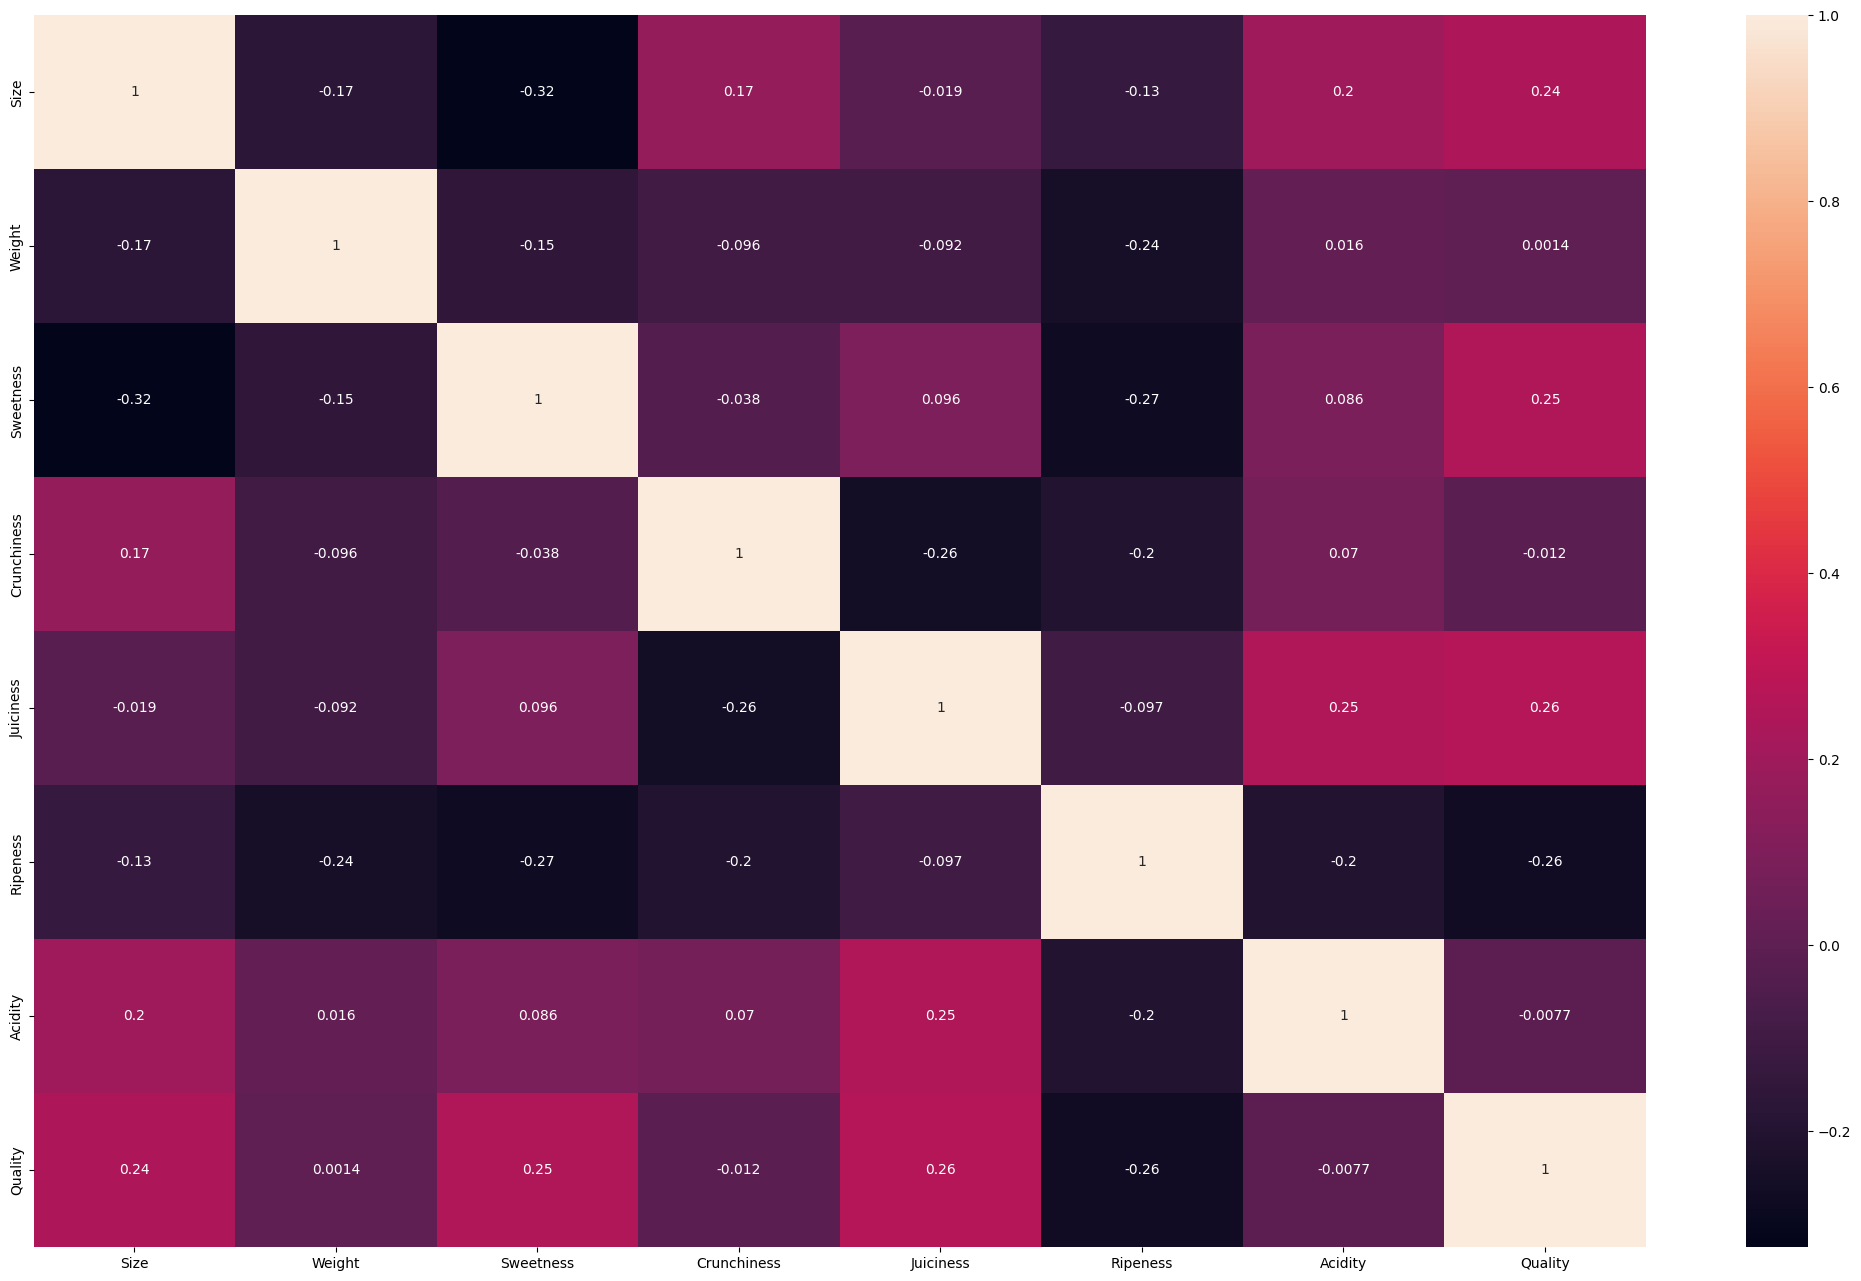

In [108]:
df_num = data_class.select_dtypes(include=np.number)
df_corr = df_num.corr()
plt.figure(figsize=(26, 16))
sns.heatmap(df_corr, annot=True)

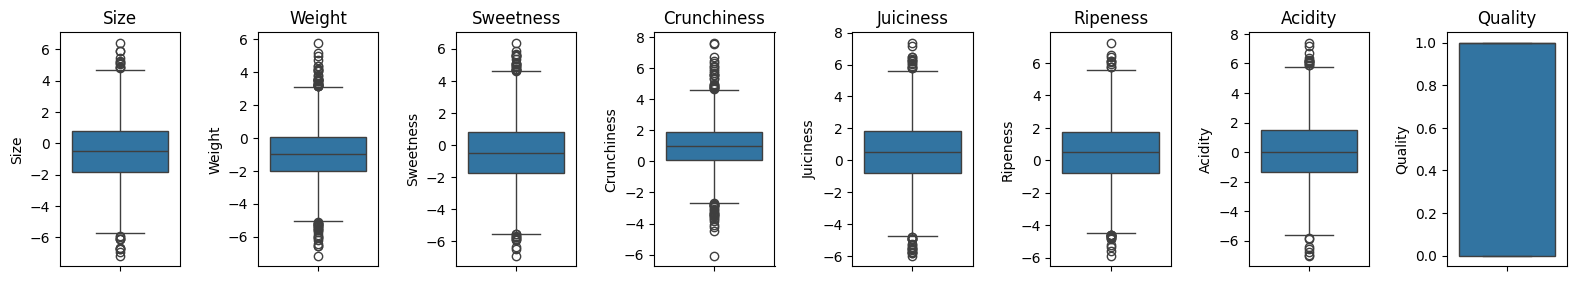

In [109]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df_num.columns):
    plt.subplot(3, 8, i + 1)
    sns.boxplot(data=df_num, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

Набор данных и так маленький поэтому выбросы удалять не будем

In [110]:
X = data_class.drop("Quality", axis=1)
y = data_class["Quality"].values

In [111]:
data_class.duplicated().sum()

0

In [112]:
# pca = PCA(n_components=3)
# X = pca.fit_transform(X, y)
# X.shape

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [114]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
print(f'1: {sum(y_train == 1)}')
print(f'0: {sum(y_train == 0)}')

1: 1605
0: 1595


In [116]:
nm = NearMiss()
X_train, y_train = nm.fit_resample(X_train, y_train.ravel())

In [117]:
print(f'1: {sum(y_train == 1)}')
print(f'0: {sum(y_train == 0)}')

1: 1595
0: 1595


In [118]:
y_train.shape

(3190,)

In [119]:
model = GaussianProcessClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       401
           1       0.92      0.92      0.92       399

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [121]:
with open("C:/reps/PoP2023-24/2_sem/1_lab/models/classificationModel.pickle","wb") as f:
    pickle.dump(model,f)

# Регрессия

In [122]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [123]:
data_reg.duplicated().sum()

0

In [124]:
data_reg.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [125]:
data_reg.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [126]:
data_reg.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [127]:
data_reg.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [128]:
categorical_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [129]:
data_reg[categorical_col] = data_reg[categorical_col].apply(
    lambda x: x.map({"yes": 1, "no": 0})
)

In [130]:
dummy_col = pd.get_dummies(data_reg['furnishingstatus']).astype(int)
data_reg = pd.concat([data_reg, dummy_col], axis = 1)

In [131]:
data_reg.drop(['furnishingstatus'], axis = 1, inplace = True)

In [132]:
data_reg

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


<Axes: >

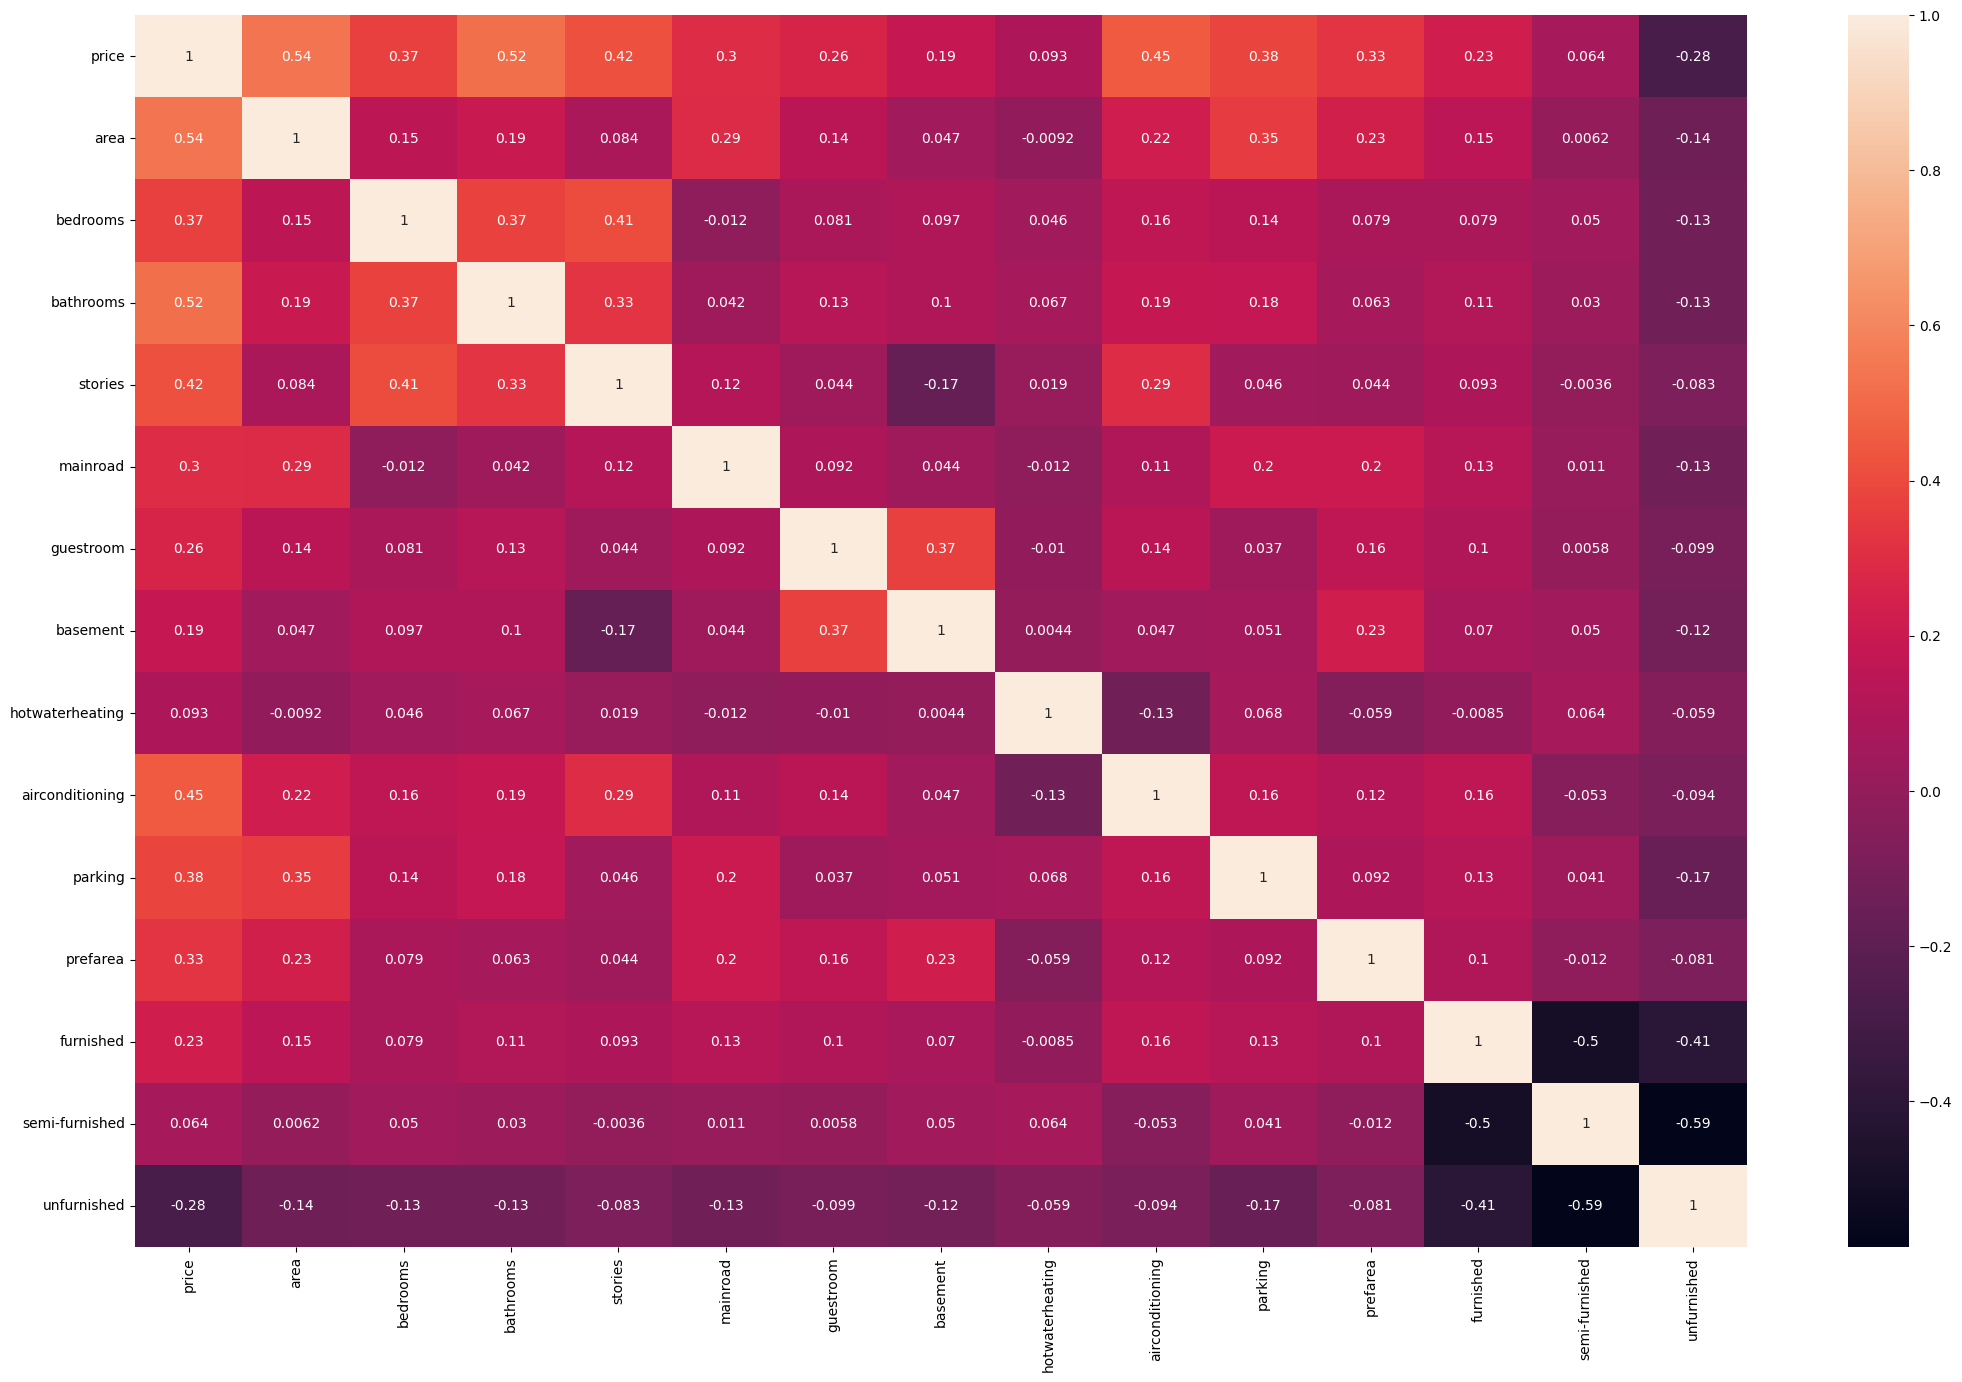

In [133]:
df_num = data_reg.select_dtypes(include=np.number)
df_corr = df_num.corr()
plt.figure(figsize=(26, 16))
sns.heatmap(df_corr, annot=True)

In [134]:
col_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [135]:
X = data_reg.drop("price", axis=1)
y = data_reg['price'].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [137]:
scaler=MinMaxScaler()
scaler.fit(X_train[col_scale])
X_train[col_scale] = scaler.transform(X_train[col_scale])
X_test[col_scale] = scaler.transform(X_test[col_scale])

In [138]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
46,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,1,0,0
93,0.381443,0.4,0.333333,0.000000,1,0,1,0,1,1.000000,0,0,1,0
335,0.148866,0.2,0.000000,0.000000,1,0,1,0,1,0.666667,0,1,0,0
412,0.065979,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,1,0,0,1
471,0.144330,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.298969,0.6,0.333333,1.000000,1,0,0,0,1,0.000000,0,0,0,1
106,0.261168,0.6,0.333333,0.000000,1,0,1,0,1,0.000000,1,0,1,0
270,0.195876,0.4,0.333333,0.666667,1,0,0,1,0,0.333333,0,1,0,0
435,0.164261,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,0,1


In [146]:
kernel = DotProduct()

In [147]:
model = GaussianProcessRegressor(kernel=kernel).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [148]:
def Metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

In [149]:
Metrics(y_test, y_pred)

MAE: 970045.278956422
MSE: 1754077517109.8093
RMSE: 1324415.9154547371
MAPE: 0.4586757461804795
R^2: 0.6529719775141944


In [150]:
y_test

array([ 4060000,  6650000,  3710000,  6440000,  2800000,  4900000,
        5250000,  4543000,  2450000,  3353000, 10150000,  2660000,
        3360000,  3360000,  2275000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6720000,  5425000,  1890000,  5250000,
        4193000, 12250000,  3080000,  5110000,  9800000,  2520000,
        6790000,  3500000,  6650000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5495000,  3675000,
        6650000,  4907000,  3150000,  4480000,  6580000,  5740000,
        3003000,  1820000,  8400000,  2450000,  4270000,  4007500,
        3234000,  1750000,  9800000,  2100000,  4340000,  3045000,
        3850000,  3500000,  4753000,  3080000,  4550000,  6510000,
        6685000,  5110000,  4550000,  6650000,  3640000,  5600000,
        3780000,  6615000,  3220000,  6650000,  4690000,  4830000,
        6860000,  2233000,  7035000,  4165000,  6195000,  6510000,
        1890000,  8190000,  2660000,  4193000, 13300000,  9681

In [151]:
y_pred

array([5164864.     , 7225304.     , 3110504.     , 4613070.     ,
       3295176.     , 3532302.     , 5612056.     , 6369328.     ,
       2723162.     , 2629624.     , 9617348.     , 2798386.     ,
       3171288.     , 3395096.     , 3681248.     , 5263424.     ,
       3036668.     , 4786952.     , 4350560.     , 3573280.     ,
       5775056.     , 5887708.     , 2731222.     , 4728088.     ,
       5245350.     , 7555634.     , 3221360.     , 5192544.     ,
       8144224.     , 3399192.     , 6491480.     , 3315152.     ,
       6709104.     , 4202312.     , 3557368.     , 5837765.     ,
       4809352.     , 4363280.     , 3191488.     , 4597232.     ,
       4566504.     , 3518320.     , 7206496.     , 3983784.     ,
       3749920.     , 4274920.     , 6758160.     , 4038056.     ,
       3769429.40625, 3418224.     , 7269008.     , 2802999.     ,
       4342144.     , 4516880.     , 3680176.     , 2679344.     ,
       7498840.     , 2920784.     , 4240004.     , 2766738.  

In [145]:
with open("C:/reps/PoP2023-24/2_sem/1_lab/models/regressionModel.pickle","wb") as f:
    pickle.dump(model,f)